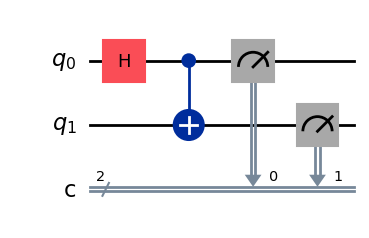

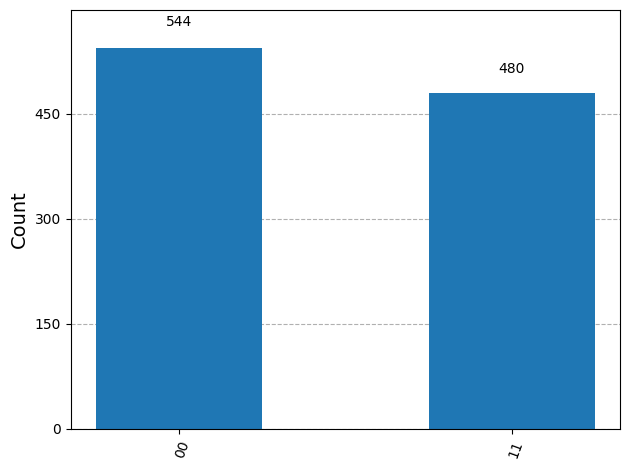

In [19]:
# Using CNOT to create Entanglement
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

%matplotlib inline

# Step 1: Create the 2-qubit, 2-classical-bit circuit
qc = QuantumCircuit(2, 2)

# Step 2: Apply Hadamard gate to qubit 0 (creates superposition)
qc.h(0)

# Step 3: Apply CNOT gate — control qubit 0, target qubit 1
qc.cx(0, 1)

# Step 4: Measure both qubits into classical bits
qc.measure(0, 0)
qc.measure(1, 1)

# Step 5: Draw the quantum circuit
qc.draw(output='mpl')
plt.show()

# Step 6: Simulate the circuit and plot results
backend = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, backend)
job = backend.run(transpiled, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
plt.show()


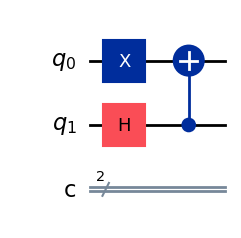

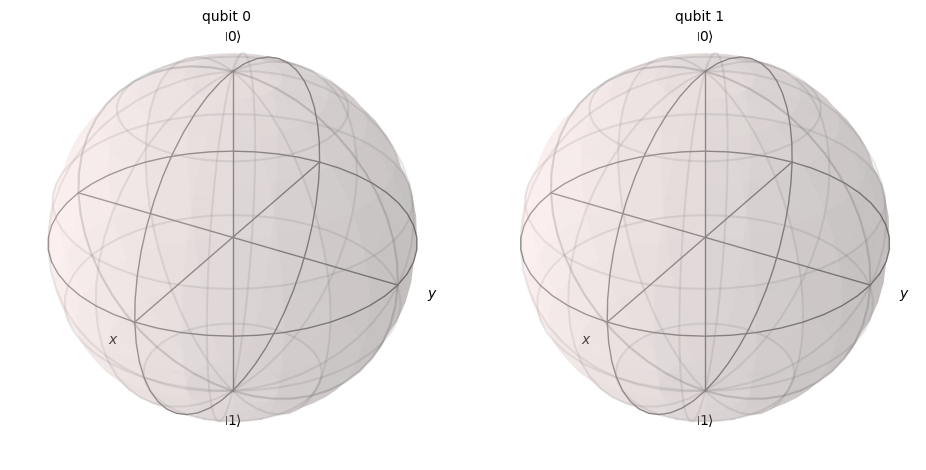

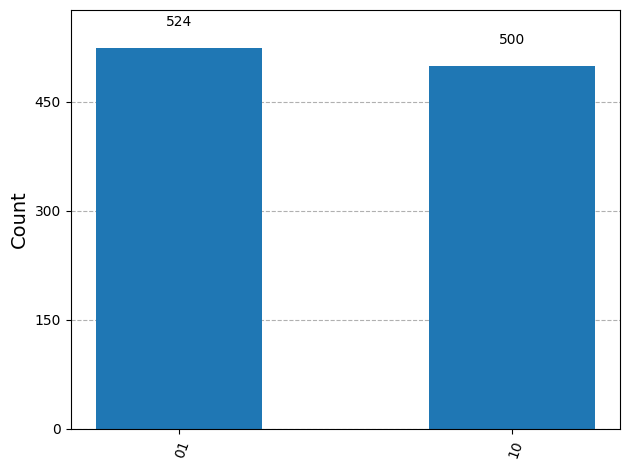

In [21]:
# ------------------------------------------------------------
# This code creates a Bell state of the form (|01⟩ + |10⟩)/√2.
# It starts from the |10⟩ state, applies a Hadamard gate to
# qubit 1 and a CNOT gate with control=1 and target=0,
# resulting in entanglement between the two qubits.
# The statevector and Bloch sphere are visualized before
# measurement, and measurement results are shown in a histogram.
# ------------------------------------------------------------

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit import transpile
import matplotlib.pyplot as plt

%matplotlib inline

# Step 1: Create circuit
qc = QuantumCircuit(2, 2)

# Step 2: Flip qubit 0 → |1⟩
qc.x(0)

# Step 3: Put qubit 1 in superposition
qc.h(1)

# Step 4: CNOT — control = 1, target = 0
qc.cx(1, 0)

# Optional: visualize the quantum circuit
qc.draw('mpl')
plt.show()

# Step 5: Simulate statevector before measurement
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)
plt.show()

# Step 6: Add measurements and simulate counts
qc.measure(0, 0)
qc.measure(1, 1)

backend = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, backend)
job = backend.run(transpiled, shots=1024)
result = job.result()
counts = result.get_counts()

# Step 7: Histogram of measured outcomes
plot_histogram(counts)
plt.show()


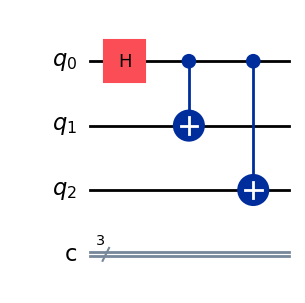

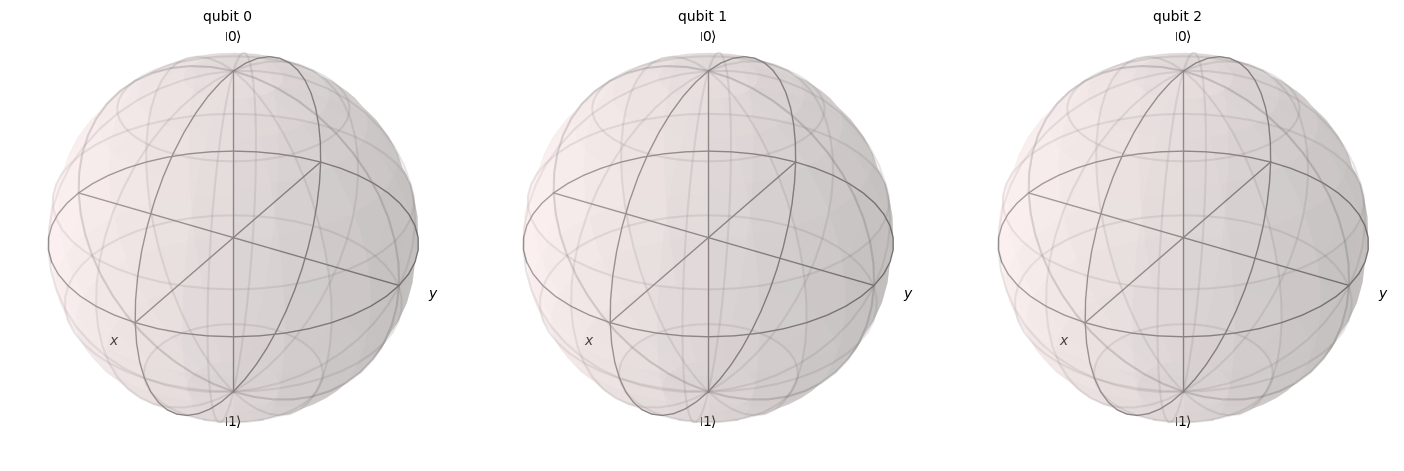

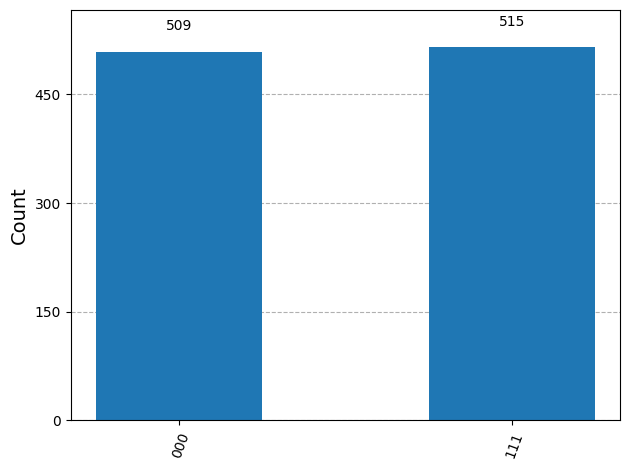

In [22]:
# ------------------------------------------------------------
# Multi-qubit gates
# This code creates a 3-qubit GHZ state: (|000⟩ + |111⟩)/√2.
# It uses a Hadamard gate on qubit 0 to create superposition,
# followed by two CNOT gates to entangle qubits 1 and 2.
# The circuit is visualized, the quantum state is inspected
# before measurement, and measurement outcomes are shown.
# ------------------------------------------------------------

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt

%matplotlib inline

# Step 1: Create a 3-qubit, 3-classical-bit circuit
qc = QuantumCircuit(3, 3)

# Step 2: Create superposition on qubit 0
qc.h(0)

# Step 3: Entangle with qubit 1 and qubit 2
qc.cx(0, 1)
qc.cx(0, 2)

# Step 4: Draw the circuit
qc.draw('mpl')
plt.show()

# Step 5: Visualize the quantum state before measurement
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)
plt.show()

# Step 6: Add measurements
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

# Step 7: Simulate and visualize results
backend = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, backend)
job = backend.run(transpiled, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
plt.show()


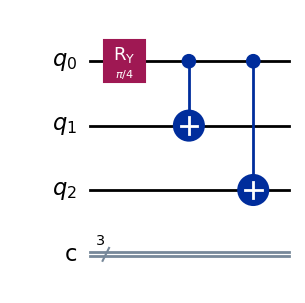

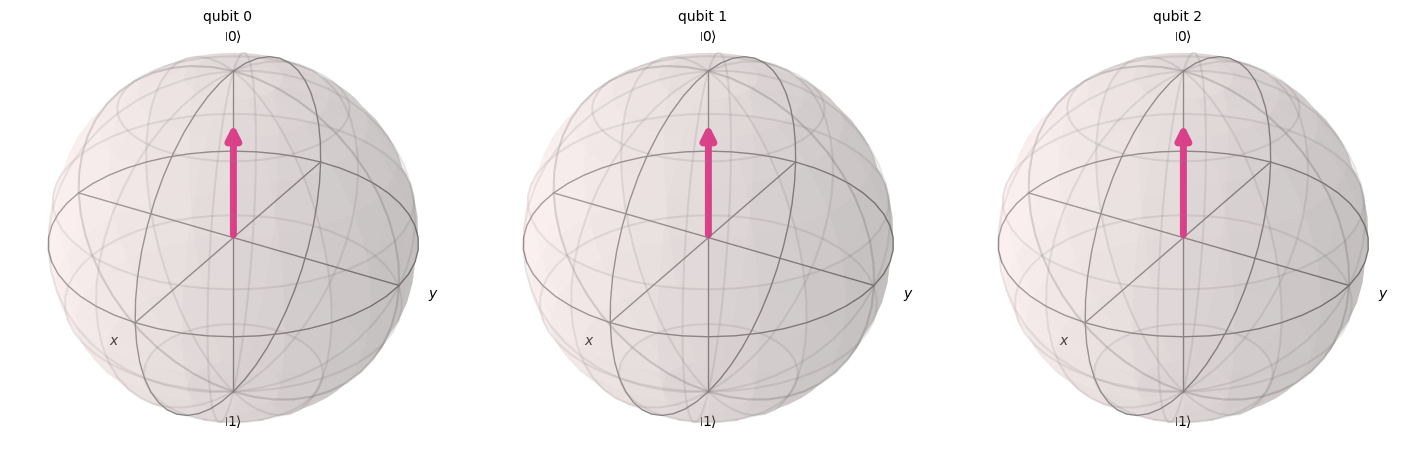

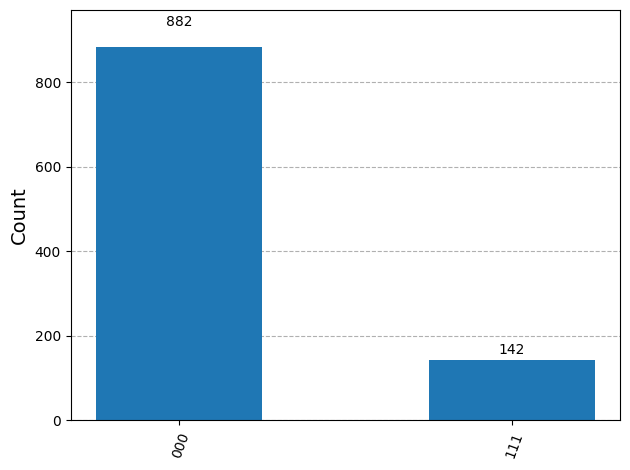

In [11]:
# ------------------------------------------------------------
# This code creates a custom 3-qubit state by rotating qubit 0
# using a Ry gate, then entangles it with qubit 1 and 2 via CNOTs.
# The resulting state is partially entangled depending on θ.
# Statevector and measurement results are visualized.
# ------------------------------------------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy import pi
import matplotlib.pyplot as plt

%matplotlib inline

# Step 1: Create the circuit
qc = QuantumCircuit(3, 3)

# Step 2: Apply Ry rotation to qubit 0 — you control entanglement with θ
theta = pi / 4  # Adjust this for different levels of superposition
qc.ry(theta, 0)

# Step 3: Entangle qubit 0 with qubit 1 and qubit 2
qc.cx(0, 1) #This flips qubit 1 only if qubit 0 = 1
qc.cx(0, 2). #This flips qubit 2 only if qubit 0 = 1

# Step 4: Visualize the circuit
qc.draw('mpl')
plt.show()

# Step 5: View statevector before measurement
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)
plt.show()

# Step 6: Add measurements
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

# Step 7: Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, backend)
job = backend.run(transpiled, shots=1024)
result = job.result()
counts = result.get_counts()

# Step 8: Visualize measurement outcomes
plot_histogram(counts)
plt.show()
# ---------------------------------------------
# With θ = π/4, qubit 0 is in a balanced superposition → entangles with 1 & 2
# You’ll likely see high counts for states like 000 and 111, but also others like 001, 110 depending on θ
# This is not a perfect GHZ, but a controlled entangled mixture

In [12]:
# Parity analysis: count how many 1s are in each result
even_parity = 0
odd_parity = 0

for outcome, count in counts.items():
    ones = outcome.count('1')
    if ones % 2 == 0:
        even_parity += count
    else:
        odd_parity += count

print(f"Even parity shots: {even_parity}")
print(f"Odd parity shots: {odd_parity}")


Even parity shots: 882
Odd parity shots: 142


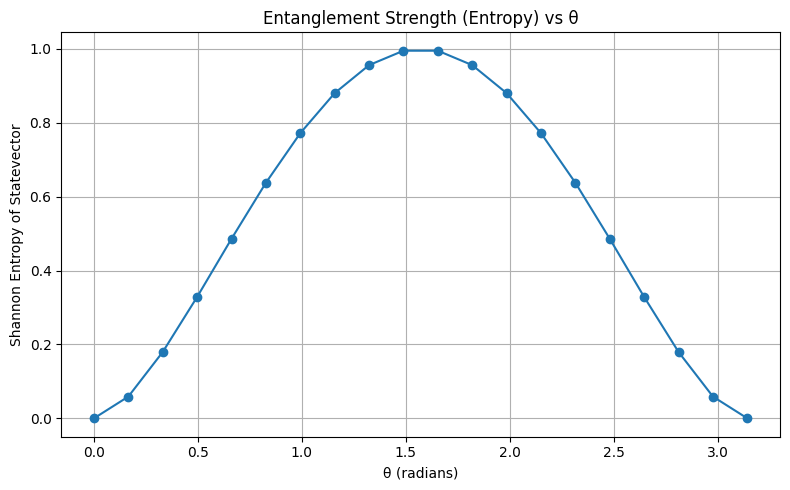

In [41]:
# -------------------------------------------------------------------
# This code analyzes how the entanglement strength of a 3-qubit system
# changes as we vary the rotation angle θ applied to qubit 0 via an Ry gate.
# We then compute the entropy of the resulting statevector
# as a rough measure of entanglement. Higher entropy implies
# a more uniform superposition and stronger entanglement.
# Finally, we plot entropy vs θ.
# -------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer

# Step 1: Define a range of θ values from 0 to π
theta_vals = np.linspace(0, np.pi, 20)
entanglement_scores = []

# Step 2: Define an "entanglement indicator"
# Here we use Shannon entropy of the statevector probabilities.
# If the state is very entangled, probability amplitudes will be
# more spread out, and entropy will be higher.

def entanglement_indicator(statevector):
    probs = np.abs(statevector.data) ** 2
    return -np.sum(probs * np.log2(probs + 1e-10))  # small epsilon to avoid log(0)

# Step 3: Simulate circuit for each θ and compute entropy
backend = Aer.get_backend('statevector_simulator')

for theta in theta_vals:
    # Step 3.1: Create a 3-qubit quantum circuit
    qc = QuantumCircuit(3)

    # Step 3.2: Apply Ry rotation to qubit 0 — this controls the superposition strength
    qc.ry(theta, 0)

    # Step 3.3: Entangle qubit 0 with qubit 1 and qubit 2 using CNOT gates
    qc.cx(0, 1)
    qc.cx(0, 2)

    # Step 3.4: Generate the quantum statevector from the circuit
    state = Statevector.from_instruction(qc)

    # Step 3.5: Compute entropy (as proxy for entanglement)
    entropy = entanglement_indicator(state)
    entanglement_scores.append(entropy)

# Step 4: Plot entropy vs θ
plt.figure(figsize=(8, 5))
plt.plot(theta_vals, entanglement_scores, marker='o')
plt.title("Entanglement Strength (Entropy) vs θ")
plt.xlabel("θ (radians)")
plt.ylabel("Shannon Entropy of Statevector")
plt.grid(True)
plt.tight_layout()
plt.show()

#---------------------------------------------------------------------------------------
#At θ = 0 or θ = π, qubit 0 is in a definite state → no superposition → no entanglement

# At θ = π/2, qubit 0 is in perfect superposition → entanglement is maximized → highest entropy

# The curve will be symmetric and bell-shaped between 0 and π

In [35]:
#Calculating of Von Neumann Entropy
from qiskit.quantum_info import partial_trace, entropy
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Step 1: Define θ values to explore how entanglement varies with superposition
theta_vals = np.linspace(0, np.pi, 20)
vN_entropies = []  # This will hold the computed entropies

# Step 2: Loop over each θ value
for theta in theta_vals:
    # Step 2.1: Create a 3-qubit quantum circuit
    qc = QuantumCircuit(3)

    # Step 2.2: Apply an Ry(θ) gate to qubit 0 to put it into a controlled superposition
    qc.ry(theta, 0)

    # Step 2.3: Entangle qubit 0 with qubit 1 and qubit 2 using CNOTs
    qc.cx(0, 1)
    qc.cx(0, 2)

    # Step 2.4: Generate the final quantum statevector for the full 3-qubit system
    state = Statevector.from_instruction(qc)

    # Step 2.5: Trace out qubits 1 and 2 to get the reduced density matrix for qubit 0
    # This gives us the mixed state of qubit 0 after it's entangled with the others
    reduced = partial_trace(state, [1, 2])

    # Step 2.6: Compute the von Neumann entropy of the reduced density matrix
    # Entropy here quantifies how entangled qubit 0 is with the rest of the system
    S = entropy(reduced, base=2)  # base=2 means the result is in bits

    # Step 2.7: Store the computed entropy
    vN_entropies.append(S)


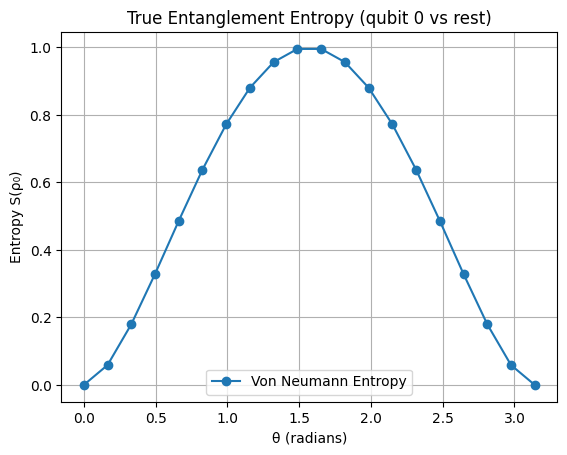

In [36]:

    plt.plot(theta_vals, vN_entropies, label='Von Neumann Entropy', marker='o')
    plt.title("True Entanglement Entropy (qubit 0 vs rest)")
    plt.xlabel("θ (radians)")
    plt.ylabel("Entropy S(ρ₀)")
    plt.grid(True)
    plt.legend()
    plt.show()

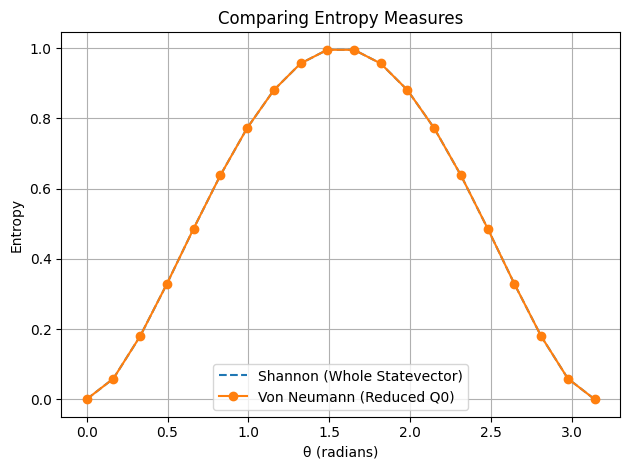

In [34]:
plt.plot(theta_vals, entanglement_scores, label='Shannon (Whole Statevector)', linestyle='--')
plt.plot(theta_vals, vN_entropies, label='Von Neumann (Reduced Q0)', marker='o')
plt.title("Comparing Entropy Measures")
plt.xlabel("θ (radians)")
plt.ylabel("Entropy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
